In [1]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     - ------------------------------------- 41.0/939.5 kB 2.0 MB/s eta 0:00:01
     ---- --------------------------------- 102.4/939.5 kB 1.2 MB/s eta 0:00:01
     ---- --------------------------------- 102.4/939.5 kB 1.2 MB/s eta 0:00:01
     ------- ------------------------------ 174.1/939.5 kB 1.1 MB/s eta 0:00:01
     -------- ----------------------------- 204.8/939.5 kB 1.0 MB/s eta 0:00:01
     ----------- -------------------------- 286.7/939.5 kB 1.1 MB/s eta 0:00:01
     ----------- -------------------------- 286.7/939.5 kB 1.1 MB/s eta 0:00:01
     -------------- ----------------------- 368.6/939.5 kB 1.0 MB/s eta 0:00:01
     ---------------- --------------------- 419.8/939.5 kB 1.0 MB/s eta 0:00:01
     ------------------- ------------------ 481.3/939.5 kB 1.1 MB/s eta 0:00:01
     ----------------------- -------------- 583.7/939.5 k

In [2]:

import yfinance as yf

In [17]:
from datetime import datetime , timedelta
end = datetime.now()
stock = "RS"
start = datetime(end.year - 10, end.month, end.day) - timedelta(days=3)  # 3 days ago
if start.month == 11 and start.day == 3:
    start -= timedelta(days=1)

try:
    reli_data = yf.download(stock, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
    print(reli_data)
except Exception as e:
    print(f"An error occurred: {e}")

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                             RS          RS          RS          RS   
Date                                                                        
2014-10-30 00:00:00+00:00   53.268684   65.779999   66.690002   65.370003   
2014-10-31 00:00:00+00:00   54.645336   67.480003   67.629997   65.260002   
2014-11-03 00:00:00+00:00   53.924614   66.589996   67.559998   66.470001   
2014-11-04 00:00:00+00:00   53.957020   66.629997   66.769997   65.190002   
2014-11-05 00:00:00+00:00   53.827461   66.470001   66.989998   66.019997   
...                               ...         ...         ...         ...   
2024-10-28 00:00:00+00:00  297.540009  297.540009  299.609985  285.420013   
2024-10-29 00:00:00+00:00  294.350006  294.350006  295.500000  292.299988   
2024-10-30 00:00:00+00:00  289.589996  289.589996  295.000000  289.119995   
2024-10-31 00:00:00+00:00  286.339996  286.339996  290.200012  285.579987   

In [18]:
reli_data.shape

(2519, 6)

In [19]:
reli_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RS,RS,RS,RS,RS,RS
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,126.477133,134.483994,136.026610,132.897678,134.477412,4.727243e+05
std,79.816331,77.255764,78.017500,76.451346,77.242027,2.566248e+05
min,42.633751,51.750000,52.099998,50.080002,50.619999,6.720000e+04
25%,66.146473,76.180000,76.849998,75.310001,76.285000,3.142000e+05
50%,87.282112,95.400002,96.360001,94.470001,95.790001,4.224000e+05
75%,174.056213,180.159996,183.125000,177.550003,180.010002,5.618000e+05
max,337.488007,340.040009,342.200012,335.359985,342.079987,4.348300e+06


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of reliance data')

<Figure size 1500x500 with 0 Axes>

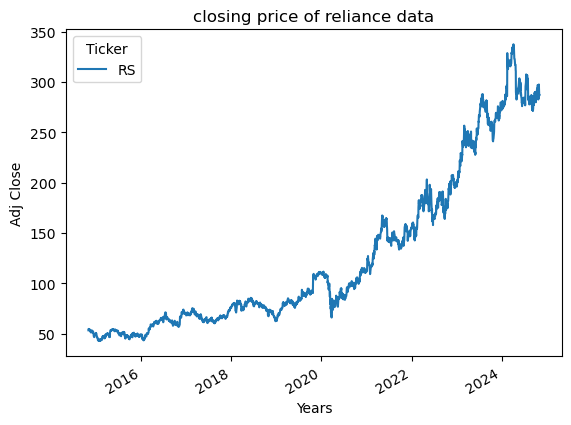

In [21]:
plt.figure(figsize=(15, 5))
reli_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("closing price of reliance data")

In [22]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Reliance Data")
    plt.show()


In [23]:
reli_data.columns

MultiIndex([('Adj Close', 'RS'),
            (    'Close', 'RS'),
            (     'High', 'RS'),
            (      'Low', 'RS'),
            (     'Open', 'RS'),
            (   'Volume', 'RS')],
           names=['Price', 'Ticker'])

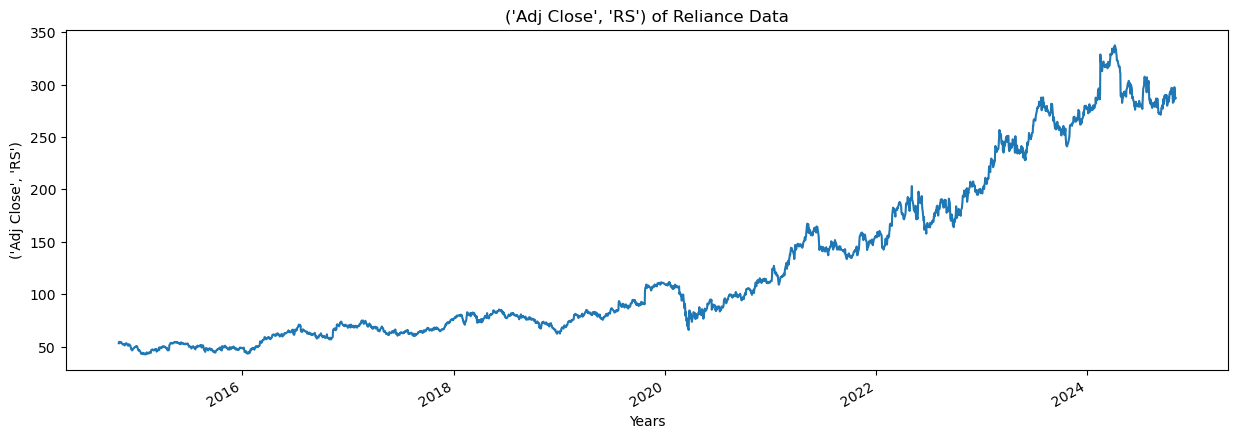

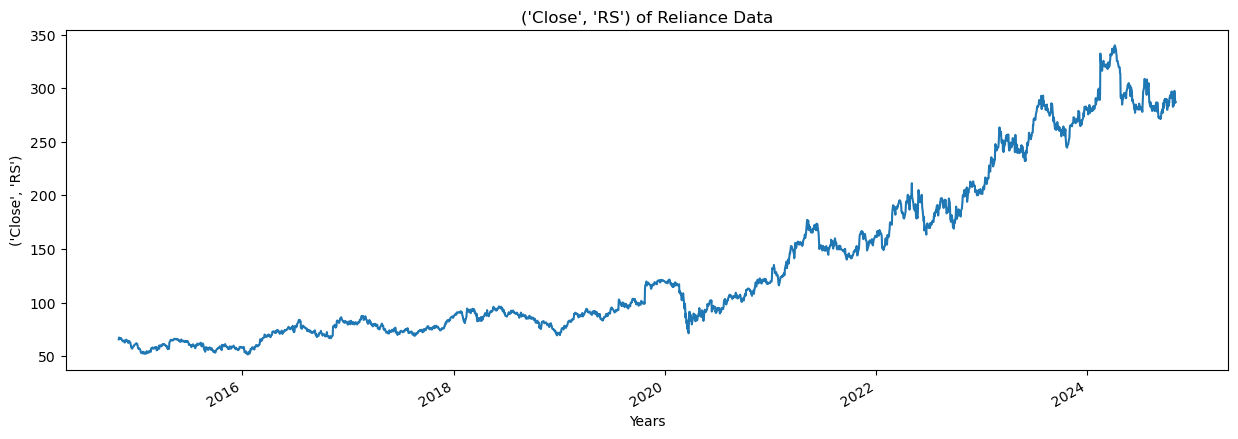

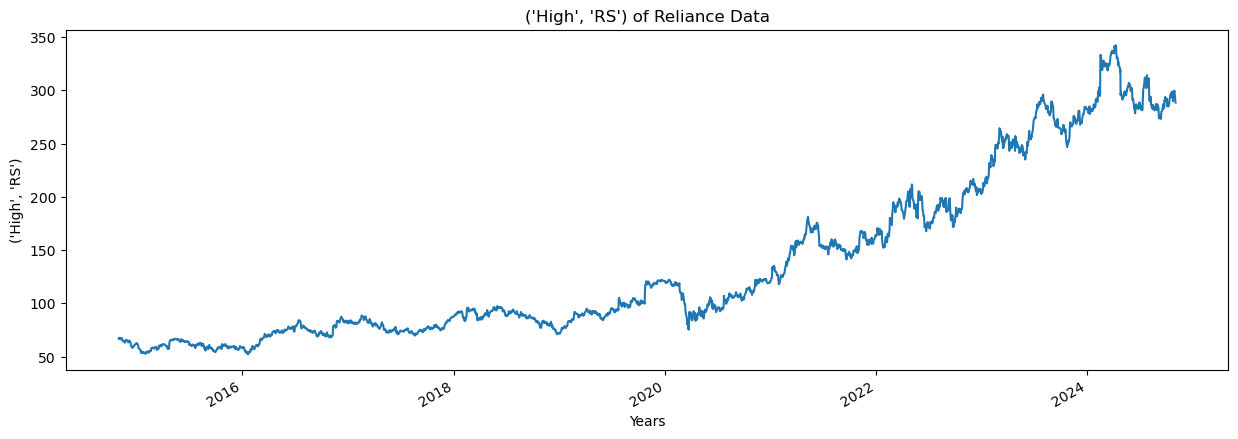

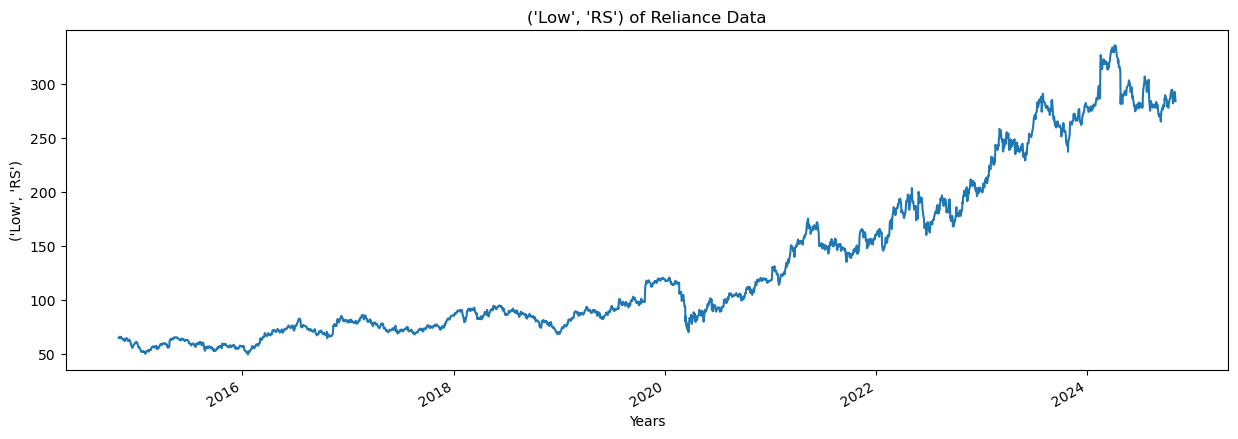

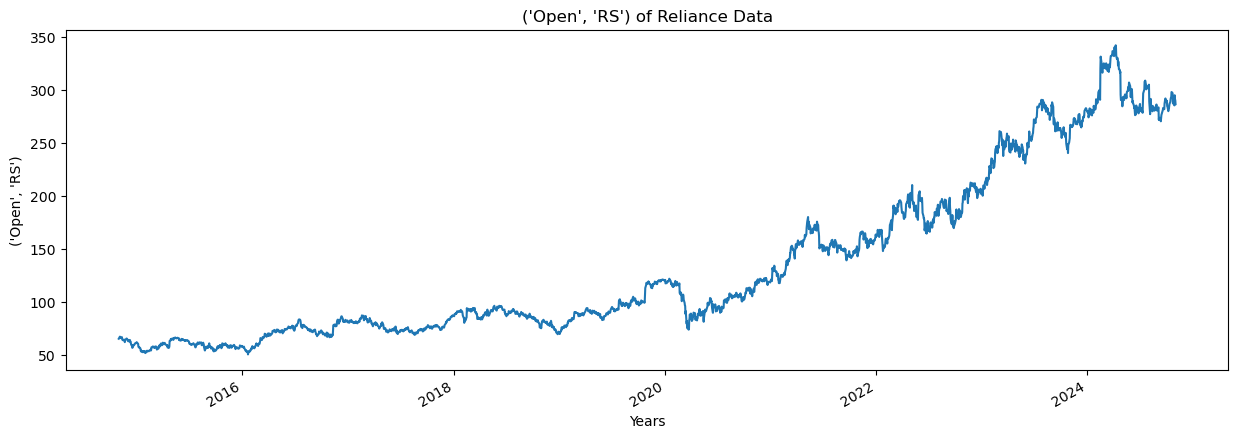

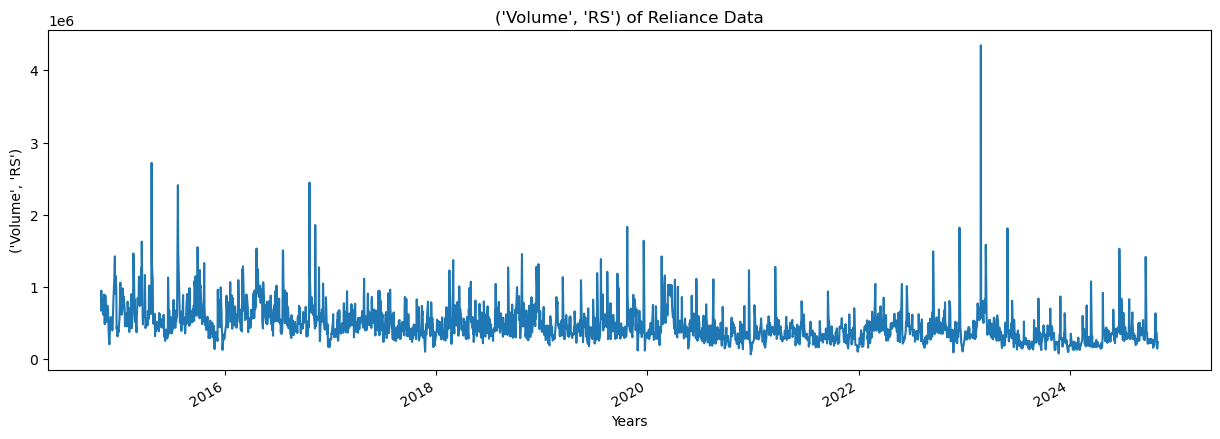

In [24]:
for column in reli_data.columns:
    plot_graph((15, 5), reli_data[column], column)

In [25]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [26]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [27]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [28]:
for i in range(2014 , 2025):
    print(i , list(reli_data.index.year).count(i))

2014 43
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 212


In [29]:
reli_data['MA_for_250_days'] = reli_data['Adj Close'].rolling(250).mean()

In [30]:
reli_data['MA_for_250_days'][0:250].tail()

Date
2015-10-21 00:00:00+00:00          NaN
2015-10-22 00:00:00+00:00          NaN
2015-10-23 00:00:00+00:00          NaN
2015-10-26 00:00:00+00:00          NaN
2015-10-27 00:00:00+00:00    49.177042
Name: MA_for_250_days, dtype: float64

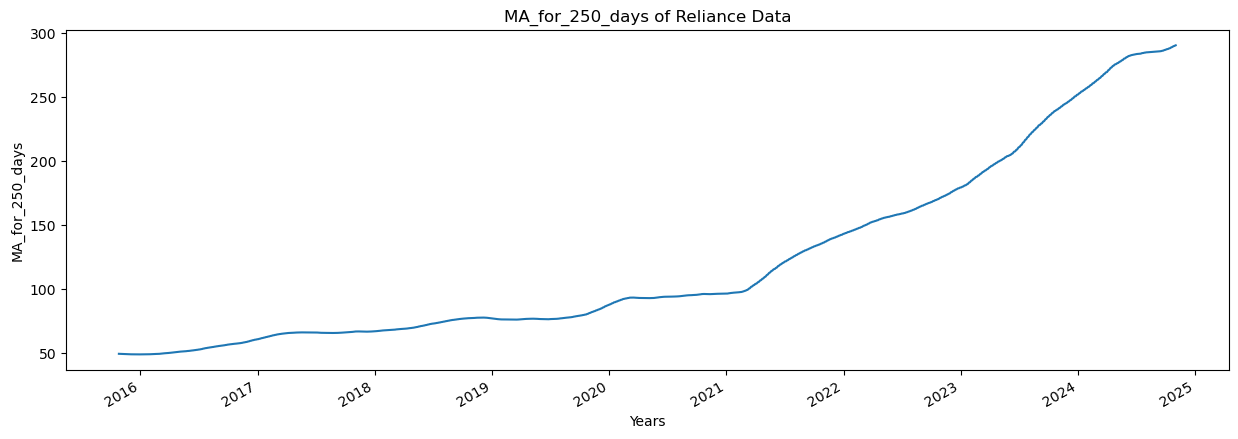

In [31]:
plot_graph((15,5), reli_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

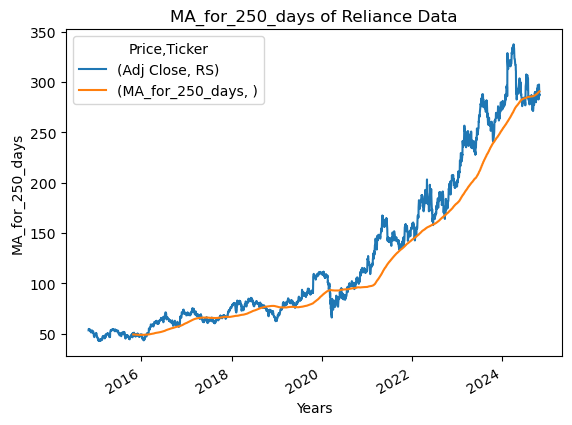

In [32]:
plot_graph((15,5), reli_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

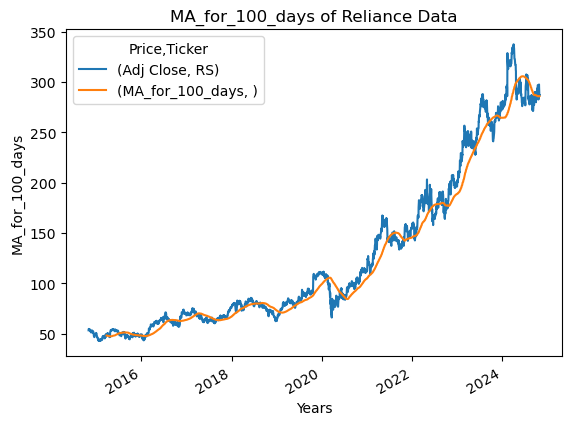

In [33]:
reli_data['MA_for_100_days'] = reli_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), reli_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

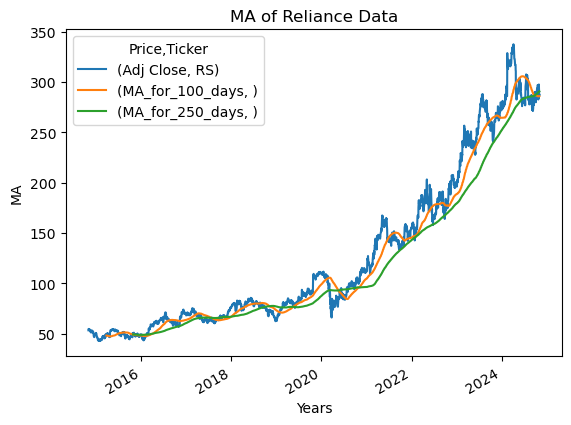

In [34]:
plot_graph((15,5), reli_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [35]:
reli_data['percentage_change'] = reli_data['Adj Close'].pct_change()

In [36]:
reli_data['percentage_change'].head()

Date
2014-10-30 00:00:00+00:00         NaN
2014-10-31 00:00:00+00:00    0.025844
2014-11-03 00:00:00+00:00   -0.013189
2014-11-04 00:00:00+00:00    0.000601
2014-11-05 00:00:00+00:00   -0.002401
Name: percentage_change, dtype: float64

In [37]:
Adj_close_price = reli_data[['Adj Close']]
max(Adj_close_price.values) , min(Adj_close_price.values)

(array([337.48800659]), array([42.63375092]))

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(Adj_close_price)
scaler_data

array([[0.03606844],
       [0.04073736],
       [0.03829303],
       ...,
       [0.83755361],
       [0.82653121],
       [0.82907484]])

In [39]:
len(scaler_data)

2519

In [40]:
X_data = []
y_data = []
for i in range(100 , len(scaler_data)):
    X_data.append(scaler_data[i - 100 :i])
    y_data.append(scaler_data[i])

import numpy as np
X_data  = np.array(X_data)
y_data = np.array(y_data)

In [41]:
X_data

array([[[0.03606844],
        [0.04073736],
        [0.03829303],
        ...,
        [0.02276814],
        [0.02279598],
        [0.02162794]],

       [[0.04073736],
        [0.03829303],
        [0.03840294],
        ...,
        [0.02279598],
        [0.02162794],
        [0.02148889]],

       [[0.03829303],
        [0.03840294],
        [0.03796354],
        ...,
        [0.02162794],
        [0.02148889],
        [0.02023742]],

       ...,

       [[0.82485771],
        [0.81678353],
        [0.80401343],
        ...,
        [0.81703504],
        [0.86451612],
        [0.85369721]],

       [[0.81678353],
        [0.80401343],
        [0.80448632],
        ...,
        [0.86451612],
        [0.85369721],
        [0.83755361]],

       [[0.80401343],
        [0.80448632],
        [0.7995539 ],
        ...,
        [0.85369721],
        [0.83755361],
        [0.82653121]]])

In [42]:
y_data

array([[0.02148889],
       [0.02023742],
       [0.0249095 ],
       ...,
       [0.83755361],
       [0.82653121],
       [0.82907484]])

In [43]:
int(len(X_data)*0.7)

1693

In [44]:
4908-100-int(len(X_data)*0.7)

3115

In [45]:
splitting_len = int(len(X_data)*0.7)
X_train = X_data[:splitting_len]
y_train = y_data[:splitting_len]

X_test = X_data[splitting_len:]
y_test = y_data[splitting_len:]

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1693, 100, 1)
(1693, 1)
(726, 100, 1)
(726, 1)


In [47]:
pip install keras


  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.13.0-cp312-cp312-win_amd64.whl.metadata (48 kB)
  Using cached ml_dtypes-0.5.0-cp312-cp312-win_amd64.whl.metadata (22 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached ml_dtypes-0.5.0-cp312-cp312-win_amd64.whl (213 kB)
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
Using cached optree-0.13.0-cp312-cp312-win_amd64.whl (283 kB)


In [48]:
pip show tensorflow keras

Name: kerasNote: you may need to restart the kernel to use updated packages.

Version: 3.6.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: c:\Users\HP\Desktop\jupyter\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: 


In [49]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.w

In [50]:
from keras.models import Sequential  
from keras.layers import Dense, LSTM

In [51]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\HP\Desktop\jupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer='adam', loss='mean_squared_error') #adam is algorithm

In [53]:
model.fit(X_train , y_train , batch_size = 1 , epochs = 2)

Epoch 1/2
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 5.0901e-04
Epoch 2/2
1693/1693 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 1.6694e-04


In [54]:
prediction = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [55]:
prediction

array([[0.34138733],
       [0.3396679 ],
       [0.33660185],
       [0.33883938],
       [0.3433677 ],
       [0.33725563],
       [0.3350866 ],
       [0.3385407 ],
       [0.34305313],
       [0.34935045],
       [0.35296488],
       [0.35570398],
       [0.35469753],
       [0.3542739 ],
       [0.3526053 ],
       [0.3551299 ],
       [0.3623134 ],
       [0.36492452],
       [0.36674044],
       [0.3608556 ],
       [0.3590617 ],
       [0.36467612],
       [0.36593786],
       [0.36690682],
       [0.363517  ],
       [0.36065766],
       [0.3549017 ],
       [0.3365079 ],
       [0.32747236],
       [0.32478166],
       [0.3220007 ],
       [0.32365242],
       [0.3272122 ],
       [0.3312817 ],
       [0.3415819 ],
       [0.34972367],
       [0.35186175],
       [0.34504476],
       [0.33584562],
       [0.33830807],
       [0.34866294],
       [0.3521543 ],
       [0.3523363 ],
       [0.3529841 ],
       [0.36075848],
       [0.3682879 ],
       [0.3802955 ],
       [0.388

In [56]:
i_preds = scaler.inverse_transform(prediction)
i_preds

array([[143.29326],
       [142.78627],
       [141.88223],
       [142.54198],
       [143.87717],
       [142.075  ],
       [141.43546],
       [142.45392],
       [143.78442],
       [145.64122],
       [146.70694],
       [147.51457],
       [147.21782],
       [147.09291],
       [146.60092],
       [147.3453 ],
       [149.4634 ],
       [150.23329],
       [150.76872],
       [149.03355],
       [148.50461],
       [150.16006],
       [150.53209],
       [150.8178 ],
       [149.81828],
       [148.97519],
       [147.27803],
       [141.85452],
       [139.19037],
       [138.397  ],
       [137.57703],
       [138.06404],
       [139.11366],
       [140.31357],
       [143.35063],
       [145.75125],
       [146.38168],
       [144.37166],
       [141.65926],
       [142.38531],
       [145.4385 ],
       [146.46794],
       [146.5216 ],
       [146.71262],
       [149.00493],
       [151.225  ],
       [154.76549],
       [157.1848 ],
       [157.80377],
       [156.63394],


In [57]:
y_pred = scaler.inverse_transform(y_test)
y_pred

array([[150.08624268],
       [148.6036377 ],
       [151.0140686 ],
       [152.31492615],
       [146.76716614],
       [148.66105652],
       [150.88970947],
       [151.76968384],
       [154.13227844],
       [154.35227966],
       [155.52879333],
       [154.44792175],
       [155.16531372],
       [154.26617432],
       [156.45661926],
       [159.49830627],
       [158.29310608],
       [159.28788757],
       [155.33746338],
       [157.04005432],
       [160.42611694],
       [158.38877869],
       [159.09657288],
       [156.77223206],
       [156.58096313],
       [153.74008179],
       [144.2802124 ],
       [145.59062195],
       [144.93063354],
       [142.57763672],
       [144.05065918],
       [144.99761963],
       [146.23149109],
       [151.5688324 ],
       [153.08966064],
       [152.80270386],
       [149.34971619],
       [147.34101868],
       [152.09486389],
       [156.05485535],
       [153.87402344],
       [153.87402344],
       [154.81138611],
       [159

In [58]:
rmse = np.sqrt(np.mean((i_preds - y_pred)**2))
rmse

20.11256071130111

In [59]:
ploting_data = pd.DataFrame(
    {
        'orignal_test_data' :y_pred.reshape(-1),
        'predictions':i_preds.reshape(-1)
    },
    index = reli_data.index[splitting_len+100:]
)
ploting_data.head()

,orignal_test_data,predictions
Date,,
2021-12-14 00:00:00+00:00,150.086243,143.293259
2021-12-15 00:00:00+00:00,148.603638,142.786270
2021-12-16 00:00:00+00:00,151.014069,141.882233
2021-12-17 00:00:00+00:00,152.314926,142.541977
2021-12-20 00:00:00+00:00,146.767166,143.877167


<Figure size 1500x600 with 0 Axes>

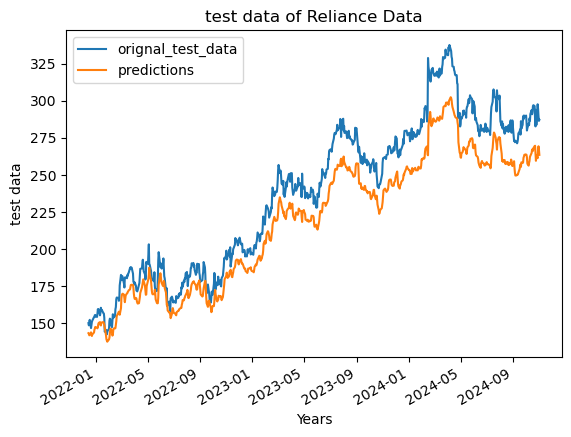

In [60]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

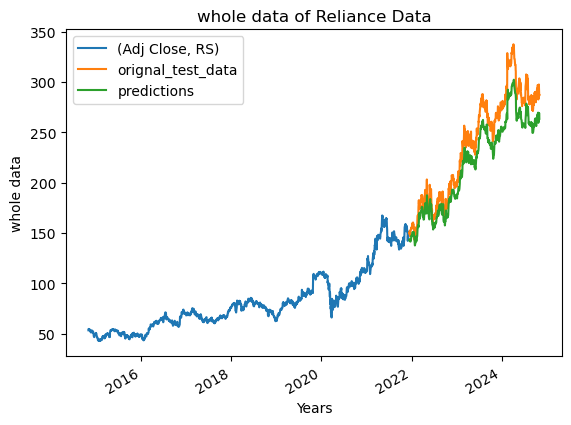

In [61]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [62]:
model.save("Latest_stock_price_model.keras")